In [8]:
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [10]:
# 定义LeNet-5网络结构
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        # 第一层卷积层：输入1通道，输出6通道，卷积核5x5，padding=same
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, padding=2)
        # 第一层池化层：2x2平均池化
        self.pool1 = nn.AvgPool2d(kernel_size=2)
        # 第二层卷积层：输入6通道，输出16通道，卷积核5x5
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        # 第二层池化层：2x2平均池化
        self.pool2 = nn.AvgPool2d(kernel_size=2)
        # 第三层卷积层：输入16通道，输出120通道，卷积核5x5
        self.conv3 = nn.Conv2d(16, 120, kernel_size=5)
        # 展平层
        self.flatten = nn.Flatten()
        # 全连接层：输入120，输出84
        self.fc1 = nn.Linear(120, 84)
        # 全连接层：输入84，输出10（对应10个类别）
        self.fc2 = nn.Linear(84, 10)

    def forward(self, x):
        # 第一层卷积 + 激活 + 池化
        x = torch.sigmoid(self.conv1(x))
        x = self.pool1(x)
        # 第二层卷积 + 激活 + 池化
        x = torch.sigmoid(self.conv2(x))
        x = self.pool2(x)
        # 第三层卷积 + 激活
        x = torch.sigmoid(self.conv3(x))
        # 展平
        x = self.flatten(x)  # 使用 flatten 层
        # 全连接层 + 激活
        x = torch.sigmoid(self.fc1(x))
        # 输出层
        x = self.fc2(x)
        return x

In [11]:
model = LeNet5().to(device)
model.load_state_dict(torch.load('lenet5.pth'))
model.eval()  # 设置为评估模式

LeNet5(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=120, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=10, bias=True)
)

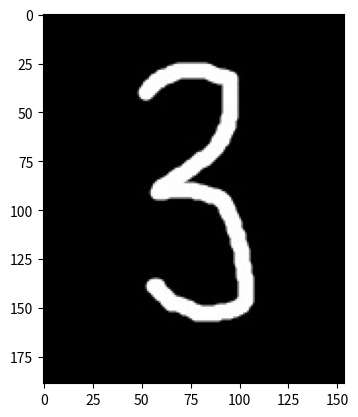

In [12]:
img = Image.open('1.jpg')  # 使用PIL打开图片
plt.imshow(img)

In [13]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # 确保图像是灰度图
    transforms.Resize((28, 28)),                  # 调整图像大小为28x28
    transforms.ToTensor(),                        # 转换为Tensor
])

In [7]:
img_tensor = transform(img).unsqueeze(0).to(device)  # 添加batch维度并移动到GPU

# 进行预测
with torch.no_grad():  # 不计算梯度
    output = model(img_tensor)
    max_values, predicted_class = torch.max(output, 1)  # 获取预测的类

# 打印预测结果
print(output)
print(f"Predicted class: {predicted_class.item()}")

tensor([[-5.3835e+00, -2.6703e+00, -2.2074e+00,  7.5327e+00, -8.9555e+00,
         -5.1739e-01, -1.0029e+01, -2.5904e+00, -7.7696e-03, -9.4275e-01]],
       device='cuda:0')
Predicted class: 3
